In [36]:
serie2 = '../data/submissions/serie2.csv'
SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/serie5.csv',
    'best_1dcnn': '../data/submissions/submission_405.csv',
    'best_gnn': '../data/submissions/best_gnn.csv',
}

# SUBMISSIONS = {
#     '435': '../data/submissions/submission_435.csv',
#     '430': '../data/submissions/submission_430.csv',
#     '405': '../data/submissions/submission_405.csv',
#     'best_1dcnn': '../data/submissions/best_1dcnn.csv',
# }

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load test parquet
test_data = pd.read_parquet('../data/raw/test.parquet')

In [39]:
test_data = test_data.drop(columns=['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles'])

In [40]:
# Add submissions
for submission_name, submission_path in SUBMISSIONS.items():
    submission = pd.read_csv(submission_path)
    test_data[submission_name + '_binds'] = submission['binds']

In [41]:
test_data

,id,protein_name,lgbm_binds,autogluon_binds,automl_binds,xgb_binds,best_1dcnn_binds,best_gnn_binds
0,295246830,BRD4,1.193881e-04,0.578972,0.399911,0.381680,2.200052e-05,0.024435
1,295246831,HSA,7.478893e-04,0.440510,0.144902,0.341728,1.113114e-04,0.000135
2,295246832,sEH,6.616116e-06,0.315976,0.013430,0.179440,2.662294e-07,0.000027
3,295246833,BRD4,6.720424e-05,0.592061,0.329299,0.400709,1.055729e-07,0.002142
4,295246834,HSA,8.293390e-04,0.452710,0.522435,0.380798,1.057610e-05,0.001155
...,...,...,...,...,...,...,...,...
1674891,296921721,HSA,9.614229e-05,0.011993,0.016106,0.015900,2.452051e-05,0.001638
1674892,296921722,sEH,1.025200e-05,0.002741,0.008737,0.010117,1.878601e-06,0.000038
1674893,296921723,BRD4,4.112720e-06,0.000198,0.001949,0.006538,1.225288e-05,0.000866
1674894,296921724,HSA,1.814961e-04,0.011480,0.010086,0.022120,7.015666e-05,0.002849


,lgbm_binds,autogluon_binds,automl_binds,xgb_binds,best_1dcnn_binds,best_gnn_binds
lgbm_binds,1.000000,0.198900,0.348630,0.294129,0.814176,0.684959
autogluon_binds,0.198900,1.000000,0.430915,0.917932,0.217706,0.232976
automl_binds,0.348630,0.430915,1.000000,0.687864,0.397857,0.402963
xgb_binds,0.294129,0.917932,0.687864,1.000000,0.325657,0.345953
best_1dcnn_binds,0.814176,0.217706,0.397857,0.325657,1.000000,0.768607
best_gnn_binds,0.684959,0.232976,0.402963,0.345953,0.768607,1.000000


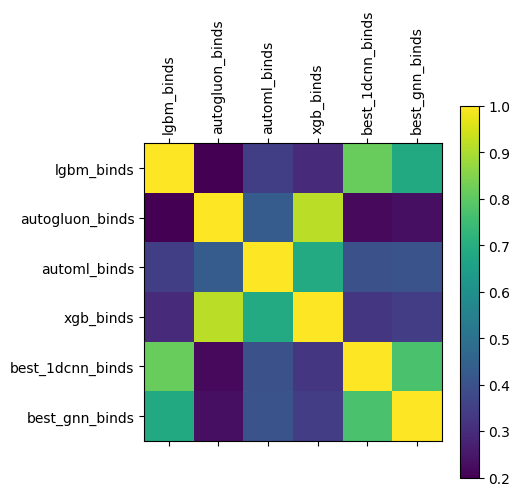

In [42]:
# Calculate similarity between submissions
submissions = test_data[[name + '_binds' for name in SUBMISSIONS.keys()]]
display(submissions.corr())
# Draw correlation matrix with labels
plt.matshow(submissions.corr())
plt.xticks(range(submissions.shape[1]), submissions.columns, fontsize=10, rotation=90)
plt.yticks(range(submissions.shape[1]), submissions.columns, fontsize=10)
plt.colorbar()
plt.show()

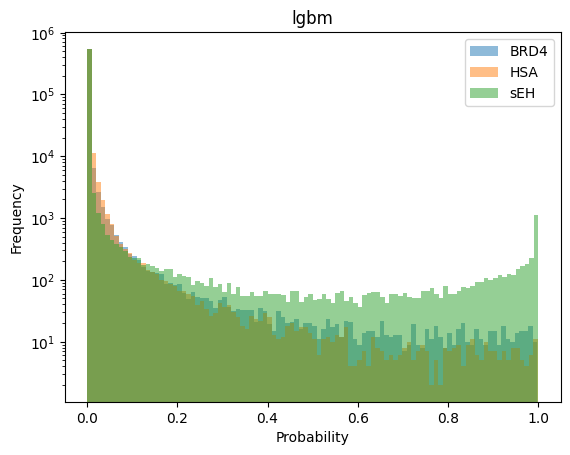

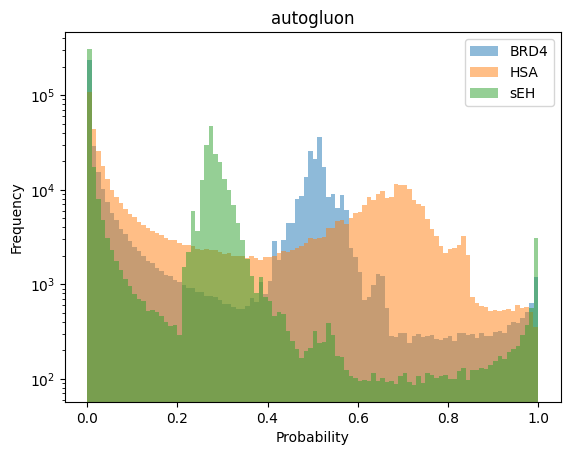

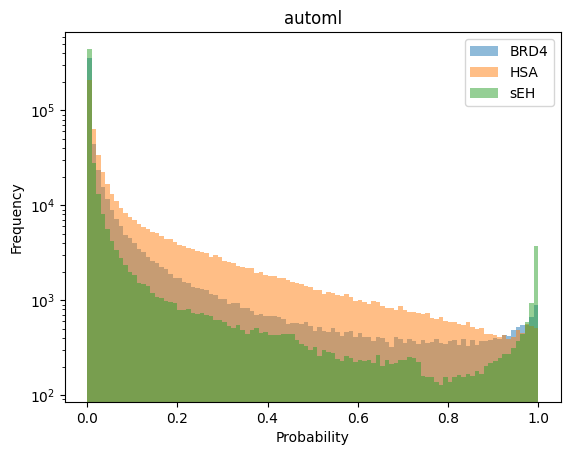

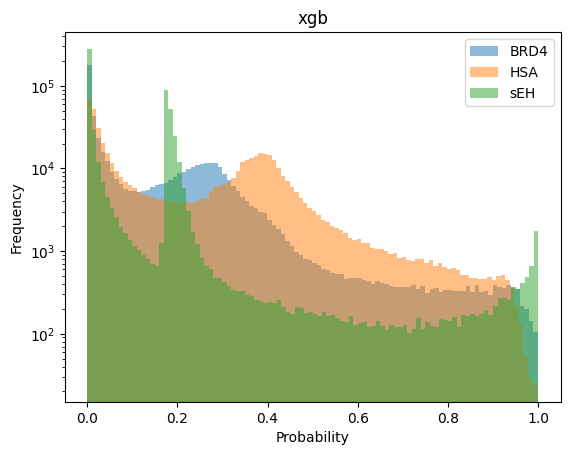

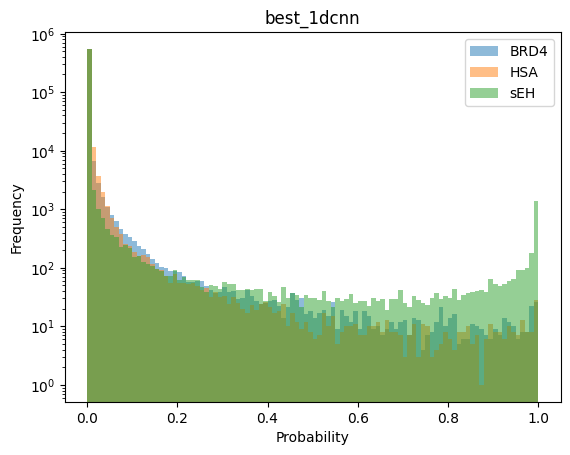

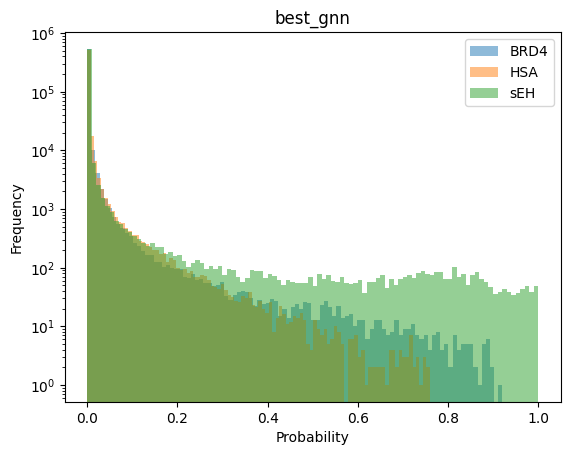

In [43]:
# Plot histogram of binding affinity to frequency for each submission and split on protein name
for submission_name in SUBMISSIONS.keys():
    plt.figure()
    plt.hist(test_data[test_data['protein_name'] == "BRD4"][submission_name + '_binds'], alpha=0.5, bins=100, label='BRD4')
    plt.hist(test_data[test_data['protein_name'] == "HSA"][submission_name + '_binds'], alpha=0.5, bins=100, label='HSA')
    plt.hist(test_data[test_data['protein_name'] == "sEH"][submission_name + '_binds'], alpha=0.5, bins=100, label='sEH')
    plt.yscale('log')
    plt.title(submission_name)
    plt.legend(loc="upper right")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()